In [1]:
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import yfinance as yf

In [2]:
# Fetching the data
start_date = '1970-01-01'
end_date = datetime.now()

# US Recession Indicator (1 during recession, 0 otherwise)
recession_data = web.DataReader('USREC', 'fred', start_date, end_date)

# Federal Funds Effective Rate (Interest Rate)
fed_funds_rate = web.DataReader('FEDFUNDS', 'fred', start_date, end_date)
# Fetching S&P 500 data
#sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Adj Close']
sp500_data = yf.download('^GSPC', start=start_date, end=end_date)['Close']

# Merging datasets for aligned plotting
data = pd.merge(fed_funds_rate, recession_data, how='inner', left_index=True, right_index=True)
data.columns = ['Fed Funds Rate', 'Recession']

# Merging S&P 500 data
data = pd.merge(data, sp500_data, how='inner', left_index=True, right_index=True)
data.columns = ['Fed Funds Rate', 'Recession', 'S&P 500']

# Fetching M2 Money Supply data (proxy for USD printing/stimulus)
m2_supply = web.DataReader('M2SL', 'fred', start_date, end_date)  # M2 Money Stock (Seasonally Adjusted)

# Convert M2 Supply to trillions of USD
m2_supply['M2SL'] = m2_supply['M2SL'] / 1000  # Convert to trillions

# Merging M2 Money Supply data
data = pd.merge(data, m2_supply, how='inner', left_index=True, right_index=True)
data.columns = ['Fed Funds Rate', 'Recession', 'S&P 500', 'M2 Supply']

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<Figure size 1000x600 with 0 Axes>

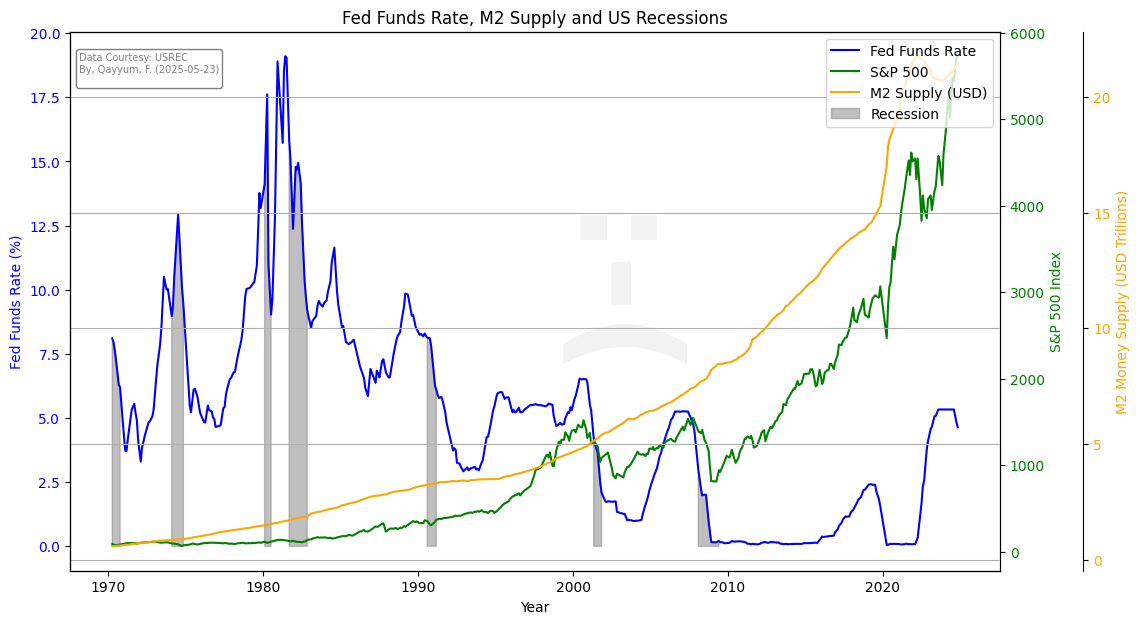

In [3]:
# Plotting the data
plt.figure(figsize=(10,6))

# Plotting the data
fig, ax1 = plt.subplots(figsize=(12,7))

current_date = datetime.now().strftime('%Y-%m-%d')

# Plot Fed Funds Rate on primary Y-axis
line1, = ax1.plot(data.index, data['Fed Funds Rate'], label='Fed Funds Rate', color='blue')
recession_fill = ax1.fill_between(data.index, 0, data['Fed Funds Rate'], where=data['Recession']==1, color='gray', alpha=0.5, label='Recession')
ax1.set_xlabel('Year')
ax1.set_ylabel('Fed Funds Rate (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary Y-axis for S&P 500
ax2 = ax1.twinx()
line2, = ax2.plot(data.index, data['S&P 500'], label='S&P 500', color='green')
ax2.set_ylabel('S&P 500 Index', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Third Y-axis for M2 Money Supply (USD stimulus proxy)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis to avoid overlap
line3, = ax3.plot(data.index, data['M2 Supply'], label='M2 Supply (USD)', color='orange')
ax3.set_ylabel('M2 Money Supply (USD Trillions)', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

# Add text annotation
textstr = (f'Data Courtesy: USREC\n'
           f'By, Qayyum, F. ({current_date})\n')
ax1.text(0.5, 0.5, ':-(', transform=plt.gca().transAxes, 
         fontsize=100, color='gray', alpha=0.1,  # Adjust transparency here
         horizontalalignment='left', verticalalignment='center',
         rotation=-90, weight='bold', style='normal')

ax1.text(0.01, 0.9, textstr, transform=plt.gca().transAxes, fontsize=7, color='gray',
         verticalalignment='bottom', horizontalalignment='left',
         bbox=dict(boxstyle='round', alpha=0.5, facecolor='white'))

# Combine legends
lines = [line1, line2, line3]
labels = [line.get_label() for line in lines]
plt.legend(lines + [recession_fill], labels + ['Recession'], loc='upper right')

# Adding labels and title
plt.title('Fed Funds Rate, M2 Supply and US Recessions')
plt.xlabel('Year')
plt.grid(True)
plt.show()

In [4]:
print (end_date)

2025-05-23 11:42:41.895612


In [5]:
print (recession_data)

            USREC
DATE             
1970-01-01      1
1970-02-01      1
1970-03-01      1
1970-04-01      1
1970-05-01      1
...           ...
2024-12-01      0
2025-01-01      0
2025-02-01      0
2025-03-01      0
2025-04-01      0

[664 rows x 1 columns]
